In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x_values = np.linspace(-np.pi, np.pi, 100)
y_values = np.linspace(-np.pi, np.pi, 100)

complexfunction = np.exp(1j*y_values)+2*np.exp(-1j*y_values/2)*np.cos((np.sqrt(3)/2)*x_values)
complexconjugate = np.conj(complexfunction)

M = np.empty((100, 100, 2, 2), dtype=complex)

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        complexfunction = np.exp(1j*y)+2*np.exp(-1j*y/2)*np.cos((np.sqrt(3)/2)*x)
        complexconjugate = np.conj(complexfunction)
        M[i, j] = np.array([[0, complexfunction], 
                            [complexconjugate, 0]])

In [26]:
eigenvalues = np.empty((100, 100, 2), dtype=complex)
eigenvectors = np.empty((100, 100, 2, 2), dtype=complex)

for i in range(100):
    for j in range(100):
        eigenvalues[i, j], eigenvectors[i, j] = np.linalg.eig(M[i, j])

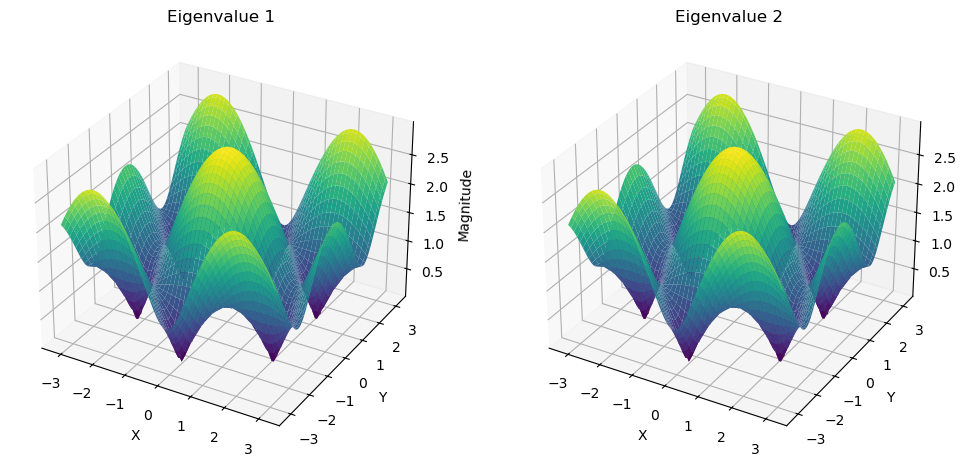

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 2D grid for the x and y coordinates
X, Y = np.meshgrid(np.linspace(-np.pi, np.pi, 100), np.linspace(-np.pi, np.pi, 100))

# Calculate the absolute values of the eigenvalues
abs_eigenvalues = np.abs(eigenvalues)

# Create a 3D plot for the first eigenvalue
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, abs_eigenvalues[:, :, 0], cmap='viridis')
ax1.set_title('Eigenvalue 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Magnitude')

# Create a 3D plot for the second eigenvalue
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, abs_eigenvalues[:, :, 1], cmap='viridis')
ax2.set_title('Eigenvalue 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Magnitude')

plt.show()